## FIRST DATA VIS APP


In [20]:
from matplotlib.patches import Circle, Rectangle, Arc
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.static import players
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
import streamlit_pandas as sp

pd.options.display.max_columns = None

In [12]:
class Player:
    def __init__(self, player_name):
        self.player_name = player_name


class NBA(Player):
    def __init__(self, player_name, season_id):
        super().__init__(player_name)
        self.season_id = season_id

    # Get player shot chart details
    def get_player_shotchartdetail(self):
        nba_players = players.get_players()
        player_dict = [
            player for player in nba_players if player["full_name"] == self.player_name
        ][0]

        # career df
        career = playercareerstats.PlayerCareerStats(
            player_id=player_dict["id"])
        career_df = career.get_data_frames()[0]

        # team id during the season
        team_id = career_df[career_df["SEASON_ID"]
                            == self.season_id]["TEAM_ID"]

        # shotchardtdetail endpoint
        shotchartlist = shotchartdetail.ShotChartDetail(
            team_id=int(team_id),
            player_id=int(player_dict["id"]),
            season_type_all_star="Regular Season",
            season_nullable=self.season_id,
            context_measure_simple="FGA",
        ).get_data_frames()

        return shotchartlist[0], shotchartlist[1]


In [13]:
nba_player = NBA("Stephen Curry", "2022-23")

player_shotchart_df, league_avg = nba_player.get_player_shotchartdetail()


/var/folders/9r/m3130z5s3rbc10_6scgfp5t00000gn/T/ipykernel_34294/2289598137.py:23: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  shotchartlist = shotchartdetail.ShotChartDetail(team_id=int(team_id),


In [4]:
player_shotchart_df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022200002,61,201939,Stephen Curry,1610612744,Golden State Warriors,1,7,27,Missed Shot,Driving Layup Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,6,60,10,1,0,20221018,GSW,LAL
1,Shot Chart Detail,0022200002,64,201939,Stephen Curry,1610612744,Golden State Warriors,1,7,22,Made Shot,Fadeaway Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),16-24 ft.,16,150,79,1,1,20221018,GSW,LAL
2,Shot Chart Detail,0022200002,68,201939,Stephen Curry,1610612744,Golden State Warriors,1,7,11,Missed Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,27,7,273,1,0,20221018,GSW,LAL
3,Shot Chart Detail,0022200002,102,201939,Stephen Curry,1610612744,Golden State Warriors,1,5,16,Missed Shot,Step Back Jump shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,24,-151,197,1,0,20221018,GSW,LAL
4,Shot Chart Detail,0022200002,132,201939,Stephen Curry,1610612744,Golden State Warriors,1,3,52,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,24,-81,229,1,0,20221018,GSW,LAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,Shot Chart Detail,0022201230,312,201939,Stephen Curry,1610612744,Golden State Warriors,2,1,3,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,28,-172,223,1,0,20230409,POR,GSW
1129,Shot Chart Detail,0022201230,317,201939,Stephen Curry,1610612744,Golden State Warriors,2,0,32,Made Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,121,239,1,1,20230409,POR,GSW
1130,Shot Chart Detail,0022201230,342,201939,Stephen Curry,1610612744,Golden State Warriors,3,10,48,Made Shot,Cutting Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,33,15,1,1,20230409,POR,GSW
1131,Shot Chart Detail,0022201230,353,201939,Stephen Curry,1610612744,Golden State Warriors,3,10,0,Made Shot,Running Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,23,-225,79,1,1,20230409,POR,GSW


In [6]:
league_avg

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT
0,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,53,5,0.094
1,League Averages,Above the Break 3,Center(C),24+ ft.,15393,5330,0.346
2,League Averages,Above the Break 3,Left Side Center(LC),24+ ft.,24499,8783,0.359
3,League Averages,Above the Break 3,Right Side Center(RC),24+ ft.,22680,8083,0.356
4,League Averages,Backcourt,Back Court(BC),Back Court Shot,406,10,0.025
5,League Averages,In The Paint (Non-RA),Center(C),8-16 ft.,12725,5894,0.463
6,League Averages,In The Paint (Non-RA),Center(C),Less Than 8 ft.,24947,10799,0.433
7,League Averages,In The Paint (Non-RA),Left Side(L),8-16 ft.,2219,982,0.443
8,League Averages,In The Paint (Non-RA),Right Side(R),8-16 ft.,2550,1152,0.452
9,League Averages,Left Corner 3,Left Side(L),24+ ft.,11066,4262,0.385


In [5]:
player_shotchart_df.isnull().any()

GRID_TYPE              False
GAME_ID                False
GAME_EVENT_ID          False
PLAYER_ID              False
PLAYER_NAME            False
TEAM_ID                False
TEAM_NAME              False
PERIOD                 False
MINUTES_REMAINING      False
SECONDS_REMAINING      False
EVENT_TYPE             False
ACTION_TYPE            False
SHOT_TYPE              False
SHOT_ZONE_BASIC        False
SHOT_ZONE_AREA         False
SHOT_ZONE_RANGE        False
SHOT_DISTANCE          False
LOC_X                  False
LOC_Y                  False
SHOT_ATTEMPTED_FLAG    False
SHOT_MADE_FLAG         False
GAME_DATE              False
HTM                    False
VTM                    False
dtype: bool

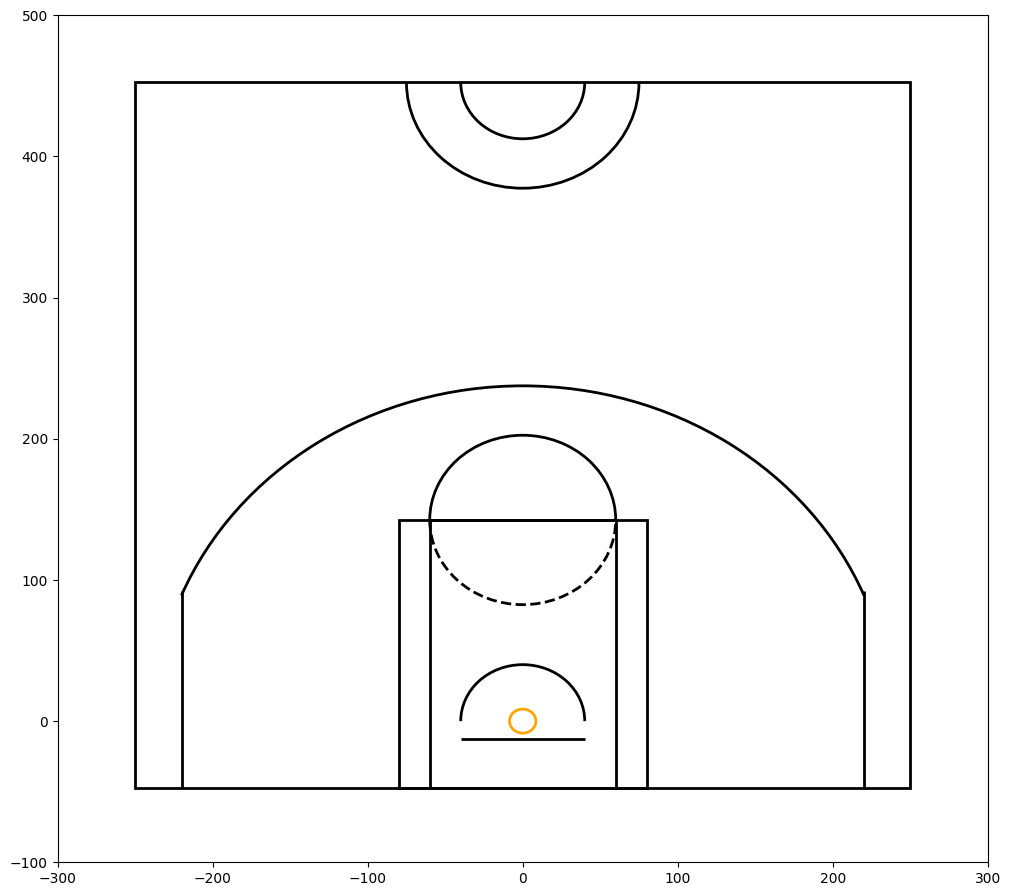

In [7]:
def draw_court(ax=None, color="black", lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    hoop = Circle((0, 0), radius=8.5, linewidth=lw, color="orange", fill=False)

    backboard = Rectangle((-40, -12.5), 80, 0, linewidth=lw, color="black")

    outter_box = Rectangle(
        (-80, -47.5), 160, 190, linewidth=lw, color="black", fill=False
    )

    inner_box = Rectangle((-60, -47.5), 120, 190,
                          linewidth=lw, color=color, fill=False)

    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180,
                     linewidth=lw, color=color)
    # Create free throw top arc
    top_free_throw = Arc(
        (0, 142.5),
        120,
        120,
        theta1=0,
        theta2=180,
        linewidth=lw,
        color=color,
        fill=False,
    )
    # Create free throw bottom arc
    bottom_free_throw = Arc(
        (0, 142.5),
        120,
        120,
        theta1=180,
        theta2=0,
        linewidth=lw,
        color=color,
        linestyle="dashed",
    )
    # Three point line
    # Create the right side 3pt lines, it's 14ft long before it arcs
    corner_three_a = Rectangle(
        (-220, -47.5), 0, 140, linewidth=lw, color=color)
    # Create the right side 3pt lines, it's 14ft long before it arcs
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    three_arc = Arc((0, 0), 475, 475, theta1=22,
                    theta2=158, linewidth=lw, color=color)

    # Center Court
    center_outer_arc = Arc(
        (0, 452.5), 150, 150, theta1=180, theta2=0, linewidth=lw, color=color
    )
    center_inner_arc = Arc(
        (0, 452.5), 80, 80, theta1=180, theta2=0, linewidth=lw, color=color
    )

    court_elements = [
        hoop,
        backboard,
        outter_box,
        inner_box,
        restricted,
        top_free_throw,
        bottom_free_throw,
        corner_three_a,
        corner_three_b,
        three_arc,
        center_inner_arc,
        center_outer_arc,
    ]
    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle(
            (-250, -47.5), 500, 500, fill=False, linewidth=lw, color="black"
        )
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax


plt.figure(figsize=(12, 11))
draw_court(outer_lines=True)
plt.xlim(-300, 300)
plt.ylim(-100, 500)
plt.show()


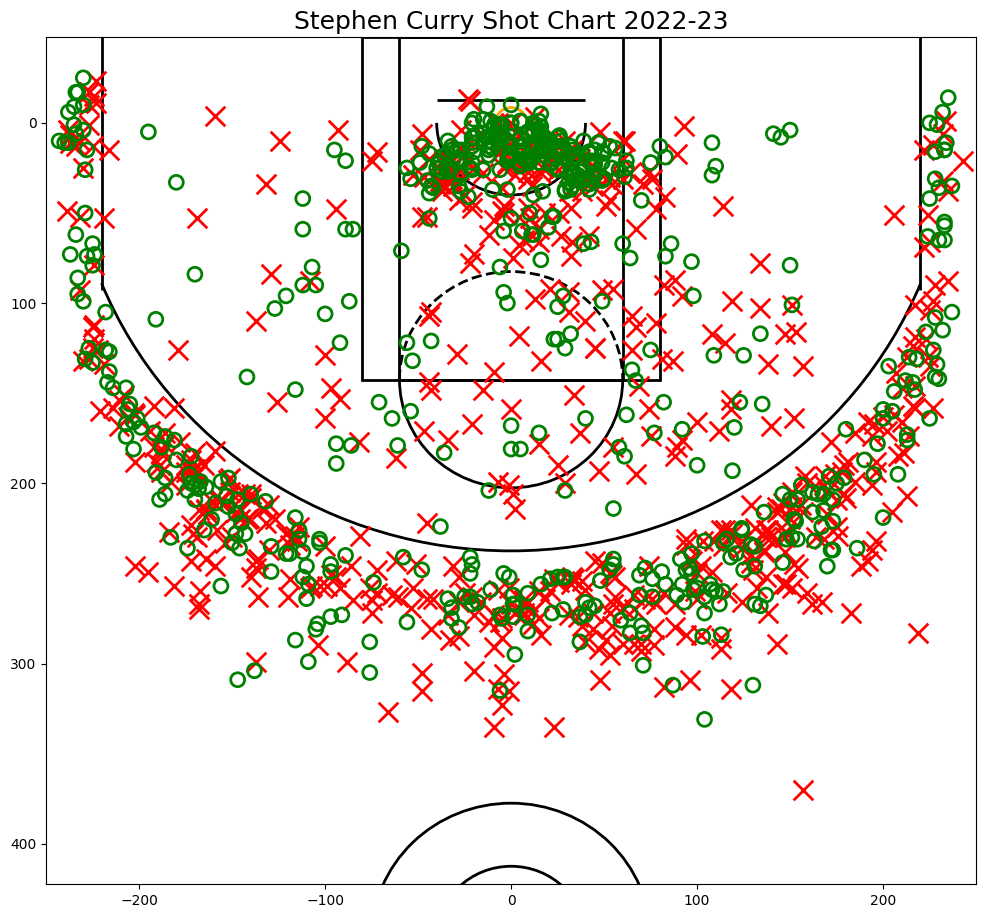

FG %: 0.493  (559, 1133)


In [34]:
def shot_chart(
    data,
    title="",
    xlim=(-250, 250),
    ylim=(422.5, -47.5),
    line_color="black",
    court_lw=2,
    outer_lines=False,
    flip_court=False,
    ax=None,
):
    if ax is None:
        ax = plt.gca()

    if not flip_court:
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    else:
        ax.set_xlim(xlim[::-1])
        ax.set_ylim(ylim[::-1])

    ax.tick_params(labelbottom="off", labelleft="off")
    ax.set_title(title, fontsize=18)

    # draws the court
    draw_court(ax, color=line_color, lw=court_lw, outer_lines=outer_lines)

    # separate color by make or miss
    x_missed = data[data["EVENT_TYPE"] == "Missed Shot"]["LOC_X"]
    y_missed = data[data["EVENT_TYPE"] == "Missed Shot"]["LOC_Y"]

    x_made = data[data["EVENT_TYPE"] == "Made Shot"]["LOC_X"]
    y_made = data[data["EVENT_TYPE"] == "Made Shot"]["LOC_Y"]

    # plot missed shots
    ax.scatter(x_missed, y_missed, c="red", marker="x", s=200, linewidths=2)
    # plot made shots
    ax.scatter(
        x_made,
        y_made,
        facecolors="none",
        edgecolors="g",
        marker="o",
        s=100,
        linewidths=2,
    )

    return ax


plt.rcParams["figure.figsize"] = (12, 11)
shot_chart(player_shotchart_df, title="Stephen Curry Shot Chart 2022-23")
plt.show()

made = round(player_shotchart_df["SHOT_MADE_FLAG"].sum() / len(player_shotchart_df), 3)
miss = player_shotchart_df["SHOT_MADE_FLAG"].sum(), len(player_shotchart_df)
print(f"FG %: {made}  {miss}")

In [152]:
mvp_data = pd.read_csv("MVP_awards.csv")

print(mvp_data.shape)
mvp_data.tail(5)


(68, 19)


,Unnamed: 0,Season,Lg,Player,Voting,Age,Tm,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
63,63,1959-60,NBA,Wilt Chamberlain,(V),23,PHW,72,46.4,37.6,27.0,2.3,NaN,NaN,0.461,NaN,0.582,17.0,0.245
64,64,1958-59,NBA,Bob Pettit,(V),26,STL,72,39.9,29.2,16.4,3.1,NaN,NaN,0.438,NaN,0.759,14.8,0.246
65,65,1957-58,NBA,Bill Russell,(V),23,BOS,69,38.3,16.6,22.7,2.9,NaN,NaN,0.442,NaN,0.519,11.3,0.206
66,66,1956-57,NBA,Bob Cousy,(V),28,BOS,64,36.9,20.6,4.8,7.5,NaN,NaN,0.378,NaN,0.821,8.8,0.178
67,67,1955-56,NBA,Bob Pettit,(V),23,STL,72,38.8,25.7,16.2,2.6,NaN,NaN,0.429,NaN,0.736,13.8,0.236


In [153]:
mvp_data = mvp_data.drop(columns="Unnamed: 0")


### Modern Era NBA


#### MVP's


In [154]:
mvp = mvp_data.head(11)
mvp


,Season,Lg,Player,Voting,Age,Tm,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,2022-23,NBA,Joel Embiid,(V),28,PHI,66,34.6,33.1,10.2,4.2,1.0,1.7,0.548,0.330,0.857,12.3,0.259
1,2021-22,NBA,Nikola Jokić,(V),26,DEN,74,33.5,27.1,13.8,7.9,1.5,0.9,0.583,0.337,0.810,15.2,0.296
2,2020-21,NBA,Nikola Jokić,(V),25,DEN,72,34.6,26.4,10.8,8.3,1.3,0.7,0.566,0.388,0.868,15.6,0.301
3,2019-20,NBA,Giannis Antetokounmpo,(V),25,MIL,63,30.4,29.5,13.6,5.6,1.0,1.0,0.553,0.304,0.633,11.1,0.279
4,2018-19,NBA,Giannis Antetokounmpo,(V),24,MIL,72,32.8,27.7,12.5,5.9,1.3,1.5,0.578,0.256,0.729,14.4,0.292
5,2017-18,NBA,James Harden,(V),28,HOU,72,35.4,30.4,5.4,8.8,1.8,0.7,0.449,0.367,0.858,15.4,0.289
6,2016-17,NBA,Russell Westbrook,(V),28,OKC,81,34.6,31.6,10.7,10.4,1.6,0.4,0.425,0.343,0.845,13.1,0.224
7,2015-16,NBA,Stephen Curry,(V),27,GSW,79,34.2,30.1,5.4,6.7,2.1,0.2,0.504,0.454,0.908,17.9,0.318
8,2014-15,NBA,Stephen Curry,(V),26,GSW,80,32.7,23.8,4.3,7.7,2.0,0.2,0.487,0.443,0.914,15.7,0.288
9,2013-14,NBA,Kevin Durant,(V),25,OKC,81,38.5,32.0,7.4,5.5,1.3,0.7,0.503,0.391,0.873,19.2,0.295


In [155]:
ws = mvp.groupby(["Season", "Player"])["WS"].sum()
ws


Season   Player               
2012-13  LeBron James             19.3
2013-14  Kevin Durant             19.2
2014-15  Stephen Curry            15.7
2015-16  Stephen Curry            17.9
2016-17  Russell Westbrook        13.1
2017-18  James Harden             15.4
2018-19  Giannis Antetokounmpo    14.4
2019-20  Giannis Antetokounmpo    11.1
2020-21  Nikola Jokić             15.6
2021-22  Nikola Jokić             15.2
2022-23  Joel Embiid              12.3
Name: WS, dtype: float64

Text(0.5, 1.0, 'Modern Era MVP Win Share Percentages')

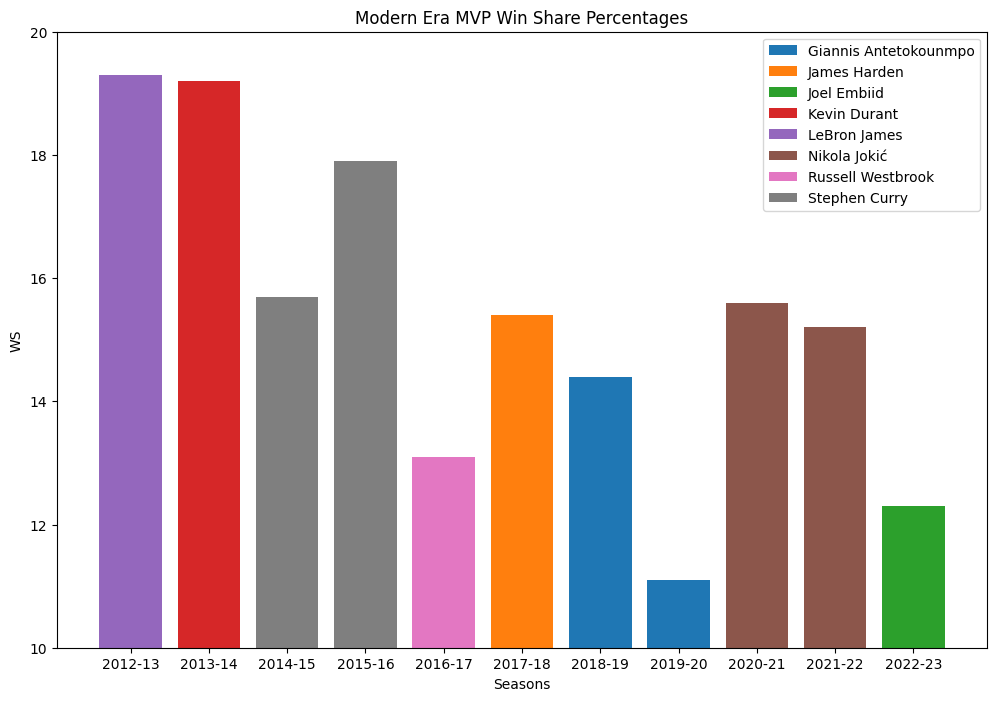

In [156]:
win = pd.DataFrame(ws, columns=["WS"])
ws.index.names = ["Year", "Player"]

pivot = win.unstack("Player")

plt.figure(figsize=(12, 8))

for player in pivot.columns:
    plt.bar(pivot.index, pivot[player], label=player[1])

plt.legend()
plt.xlabel("Seasons")
plt.ylabel("WS")
plt.ylim(10, 20)
plt.title("Modern Era MVP Win Share Percentages")

### League Data


In [157]:
seasons = [
    "2012-13",
    "2013-14",
    "2014-15",
    "2015-16",
    "2016-17",
    "2017-18",
    "2018-19",
    "2019-20",
    "2020-21",
    "2021-22",
    "2022-23",
]


In [158]:
modern_data = pd.read_csv("nba_player_stats_years.csv")
modern_data.head()


,Rank,Year,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,...,Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored,Efficency,AST/TOV,STL/TOV
0,2,1979-80,1979,Regular Season,77449,Moses Malone,1610612745,HOU,82,3140,...,1190,147,80.0,107.0,300.0,210,2119,2352,0.49,0.27
1,5,1979-80,1979,Regular Season,76003,Kareem Abdul-Jabbar,1610612747,LAL,82,3143,...,886,371,81.0,280.0,297.0,216,2034,2695,1.25,0.27
2,7,1979-80,1979,Regular Season,76504,Adrian Dantley,1610612762,UTH,68,2674,...,516,191,96.0,14.0,233.0,211,1903,1867,0.82,0.41
3,10,1979-80,1979,Regular Season,77615,Mike Mitchell,1610612739,CLE,82,2802,...,591,93,70.0,77.0,172.0,259,1820,1699,0.54,0.41
4,13,1979-80,1979,Regular Season,76362,Bill Cartwright,1610612752,NYK,82,3150,...,726,165,48.0,101.0,222.0,279,1781,1934,0.74,0.22


In [194]:
league_data = modern_data.drop(columns=["Rank"])
league_data = modern_data.drop(columns=["Player ID"])

In [160]:
league_data["PPG"] = league_data["Points Scored"] / league_data["Games Played"]
league_data["PPG"] = round(league_data["PPG"], 2)


### Playoffs


In [161]:
ps_data = league_data[
    (league_data["Year"].isin(seasons)) & (league_data["Season Type"] == "Playoffs")
]
ps_data

,Rank,Year,Season Start Year,Season Type,Player,Team ID,Team,Games Played,Minutes Played,FG Made,...,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored,Efficency,AST/TOV,STL/TOV,PPG
8457,3,2012-13,2012,Playoffs,Tim Duncan,1610612759,SAS,21,735,151,...,40,18.0,34.0,42.0,53,381,456,0.95,0.43,18.14
8458,8,2012-13,2012,Playoffs,Roy Hibbert,1610612754,IND,19,694,120,...,26,3.0,37.0,43.0,74,323,399,0.60,0.07,17.00
8459,9,2012-13,2012,Playoffs,David West,1610612754,IND,19,689,115,...,39,13.0,15.0,45.0,54,302,312,0.87,0.29,15.89
8460,14,2012-13,2012,Playoffs,Zach Randolph,1610612763,MEM,15,554,99,...,24,10.0,7.0,31.0,52,261,274,0.77,0.32,17.40
8461,15,2012-13,2012,Playoffs,Marc Gasol,1610612763,MEM,15,609,93,...,48,13.0,33.0,18.0,53,258,331,2.67,0.72,17.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24416,6,2015-16,2015,Playoffs,Stephen Curry,1610612744,GSW,18,614,148,...,93,26.0,5.0,75.0,39,452,403,1.24,0.35,25.11
24929,2,2021-22,2021,Playoffs,Stephen Curry,1610612744,GSW,22,764,202,...,129,29.0,8.0,57.0,59,602,566,2.26,0.51,27.36
24953,2,2018-19,2018,Playoffs,Stephen Curry,1610612744,GSW,22,846,190,...,126,24.0,4.0,66.0,68,620,590,1.91,0.36,28.18
25161,2,2014-15,2014,Playoffs,Stephen Curry,1610612744,GSW,21,826,200,...,134,39.0,3.0,82.0,47,594,535,1.63,0.48,28.29


In [162]:
ps_data.groupby(["Player"])["Games Played"].sum().sort_values(ascending=False).head(10)

Player
LeBron James      167
Klay Thompson     158
Draymond Green    157
Danny Green       151
Stephen Curry     147
Andre Iguodala    142
Al Horford        125
Kevin Durant      123
Kawhi Leonard     123
Kyle Lowry        117
Name: Games Played, dtype: int64

In [163]:
points = (
    ps_data.groupby("Player")["Points Scored"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

Text(0.5, 1.0, 'Modern Era Playoff Points Leaders')

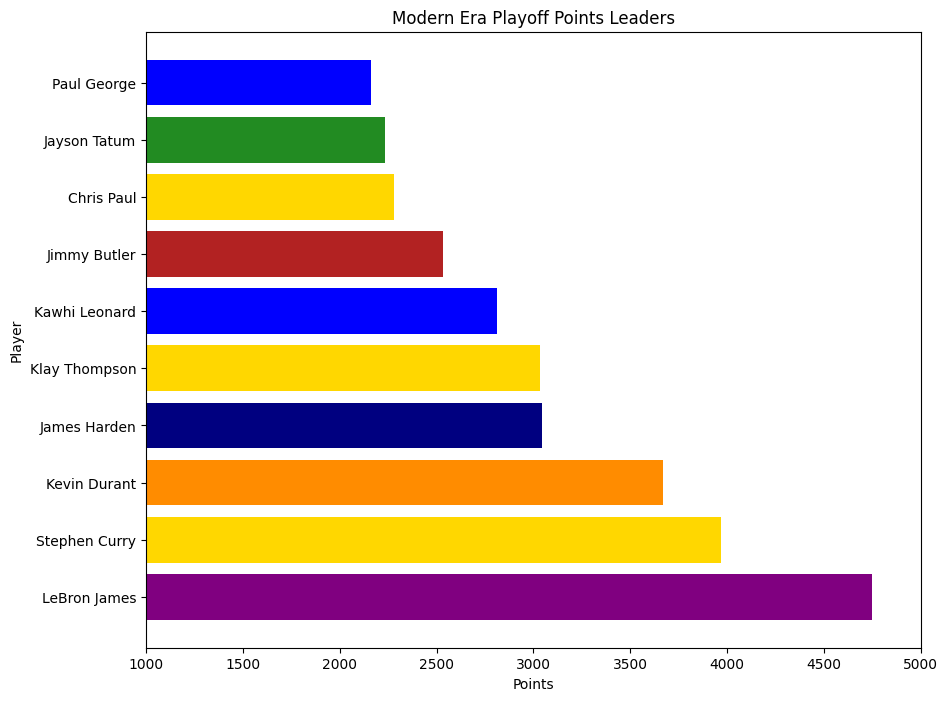

In [164]:
plt.figure(figsize=(10, 8))
plt.barh(
    points.index,
    points.values,
    color=[
        "purple",
        "gold",
        "darkorange",
        "navy",
        "gold",
        "blue",
        "firebrick",
        "gold",
        "forestgreen",
        "blue",
    ],
)
plt.xlabel("Points")
plt.ylabel("Player")
plt.xlim(1000, 5000)
plt.title("Modern Era Playoff Points Leaders")

In [165]:
max_ppg = ps_data.groupby(["Year"])["PPG"].idxmax()
result = ps_data.loc[max_ppg, ["Year", "Player", "PPG"]]
result.set_index("Year", inplace=True)
# result.sort_values(by="Year", inplace=True)

result

,Player,PPG
Year,,
2012-13,Kevin Durant,30.82
2013-14,Kevin Durant,29.63
2014-15,Anthony Davis,31.50
2015-16,Kevin Durant,28.39
2016-17,Russell Westbrook,37.40
2017-18,LeBron James,34.00
2018-19,Kevin Durant,32.25
2019-20,Donovan Mitchell,36.29
2020-21,Luka Doncic,35.71


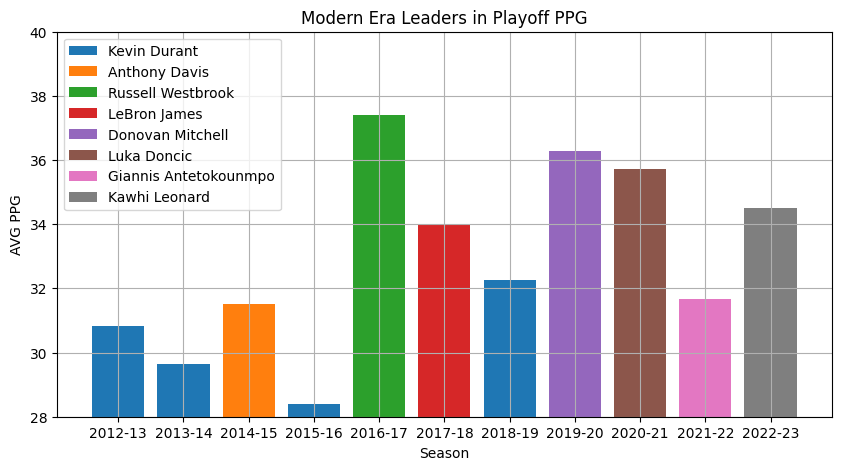

In [166]:
plt.figure(figsize=(10, 5))
i = [
    "2012-13",
    "2013-14",
    "2014-15",
    "2015-16",
    "2016-17",
    "2017-18",
    "2018-19",
    "2019-20",
    "2020-21",
    "2021-22",
    "2022-23",
]
for player in result["Player"].unique():
    ppg = result[result["Player"] == player]
    ppg = ppg.reindex(i)
    plt.bar(ppg.index, ppg["PPG"], label=player)

plt.legend()
plt.ylim(28, 40)
plt.title("Modern Era Leaders in Playoff PPG")
plt.ylabel("AVG PPG")
plt.xlabel("Season")
plt.grid()


In [168]:
max_3pt = ps_data.groupby(["Year"])["3-Pt FG Made"].idxmax()
r = ps_data.loc[max_3pt, ["Year", "Player", "3-Pt FG Made"]]
r.set_index("Year", inplace=True)


r


,Player,3-Pt FG Made
Year,,
2012-13,Danny Green,55.0
2013-14,Paul George,52.0
2014-15,Stephen Curry,98.0
2015-16,Klay Thompson,98.0
2016-17,Stephen Curry,72.0
2017-18,Klay Thompson,67.0
2018-19,Stephen Curry,92.0
2019-20,Jamal Murray,62.0
2020-21,Khris Middleton,60.0


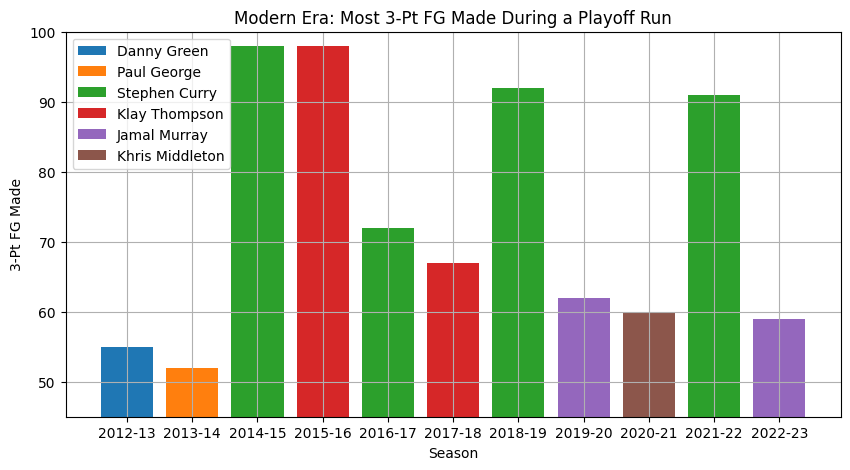

In [169]:
plt.figure(figsize=(10, 5))

for player in r["Player"].unique():
    p3 = r[r["Player"] == player]
    p3 = p3.reindex(i)
    plt.bar(p3.index, p3["3-Pt FG Made"], label=player)

plt.legend()
plt.ylim(45, 100)
plt.title("Modern Era: Most 3-Pt FG Made During a Playoff Run")
plt.ylabel("3-Pt FG Made")
plt.xlabel("Season")
plt.grid()


In [170]:
curry = league_data[league_data["Player"] == "Stephen Curry"].drop(index=18215)
rs_curry = curry[curry["Season Type"] == "Regular Season"]
ps_curry = curry[curry["Season Type"] == "Playoffs"]

In [171]:
r_curry = rs_curry.groupby(["Year"])["3-Pt FG %"].sum()
p_curry = ps_curry.groupby(["Year"])["3-Pt FG %"].sum()

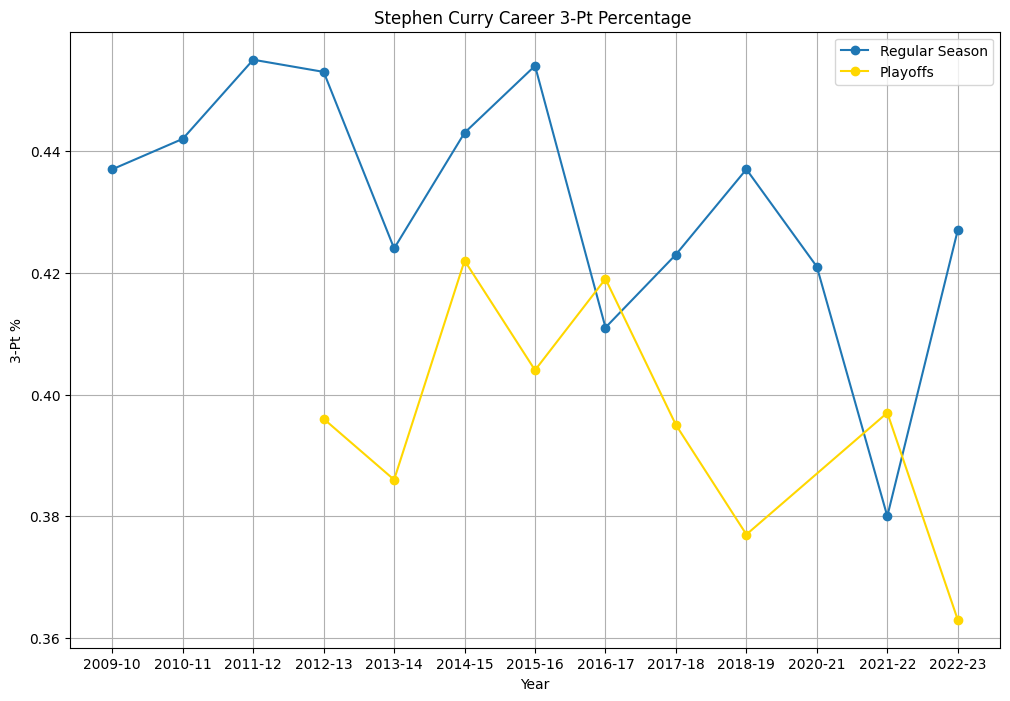

In [195]:
plt.figure(figsize=(12, 8))
plt.plot(r_curry.index, r_curry.values, marker="o", label="Regular Season")
plt.plot(p_curry.index, p_curry.values, marker="o", label="Playoffs", color="gold")

plt.xlabel("Year")
plt.ylabel("3-Pt %")
plt.title("Stephen Curry Career 3-Pt Percentage ")
plt.legend()
plt.grid()

### Regular Season


In [173]:
rs_data = league_data[
    (league_data["Year"].isin(seasons))
    & (league_data["Season Type"] == "Regular Season")
]
rs_data

,Rank,Year,Season Start Year,Season Type,Player,Team ID,Team,Games Played,Minutes Played,FG Made,...,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored,Efficency,AST/TOV,STL/TOV,PPG
8321,14,2012-13,2012,Regular Season,David Lee,1610612744,GSW,79,2907,602,...,279,67.0,22.0,207.0,246,1459,1883,1.35,0.32,18.47
8322,18,2012-13,2012,Regular Season,Brook Lopez,1610612751,BKN,74,2253,570,...,70,33.0,154.0,131.0,152,1437,1456,0.53,0.25,19.42
8323,30,2012-13,2012,Regular Season,Greg Monroe,1610612765,DET,81,2687,514,...,281,105.0,55.0,234.0,190,1298,1616,1.20,0.45,16.02
8324,33,2012-13,2012,Regular Season,Carlos Boozer,1610612741,CHI,79,2546,544,...,179,66.0,28.0,176.0,239,1281,1482,1.02,0.38,16.22
8325,71,2012-13,2012,Regular Season,JJ Hickson,1610612757,POR,80,2323,418,...,88,48.0,51.0,145.0,160,1018,1476,0.61,0.33,12.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27029,8,2016-17,2016,Regular Season,Stephen Curry,1610612744,GSW,79,2639,675,...,524,142.0,17.0,239.0,183,1999,1991,2.19,0.59,25.30
27030,1,2020-21,2020,Regular Season,Stephen Curry,1610612744,GSW,63,2152,658,...,363,77.0,8.0,213.0,119,2015,1855,1.70,0.36,31.98
27031,8,2018-19,2018,Regular Season,Stephen Curry,1610612744,GSW,69,2331,632,...,361,92.0,25.0,192.0,166,1881,1804,1.88,0.48,27.26
27032,1,2018-19,2018,Regular Season,James Harden,1610612745,HOU,78,2867,843,...,586,158.0,58.0,387.0,244,2818,2581,1.51,0.41,36.13


In [174]:
made_3P = rs_data.groupby(["Year"])["3-Pt FG Made"].sum()

In [175]:
attempted_3P = rs_data.groupby(["Year"])["3-Pt FG Attempts"].sum()
attempted_3P.sort_values(ascending=False)

Year
2021-22    86535.0
2022-23    84165.0
2018-19    78742.0
2020-21    74822.0
2019-20    72252.0
2017-18    71339.0
2016-17    66421.0
2015-16    59241.0
2014-15    55137.0
2013-14    52974.0
2012-13    49067.0
Name: 3-Pt FG Attempts, dtype: float64

In [176]:
percent_3P = made_3P / attempted_3P

percent_3P


Year
2012-13    0.358754
2013-14    0.359686
2014-15    0.350037
2015-16    0.353691
2016-17    0.357538
2017-18    0.361752
2018-19    0.355020
2019-20    0.357942
2020-21    0.366563
2021-22    0.353591
2022-23    0.360708
dtype: float64

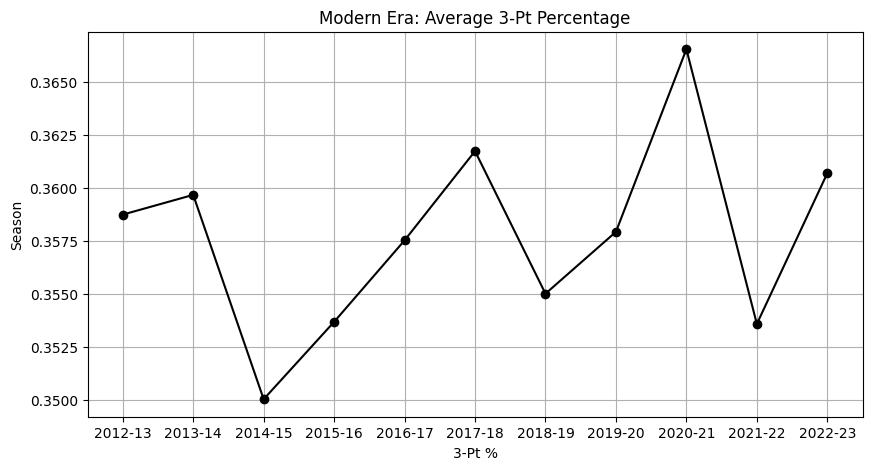

In [177]:
plt.figure(figsize=(10, 5))
plt.plot(percent_3P.index, percent_3P.values, marker="o", color="black")
plt.title("Modern Era: Average 3-Pt Percentage")
plt.ylabel("Season")
plt.xlabel("3-Pt %")
plt.grid()

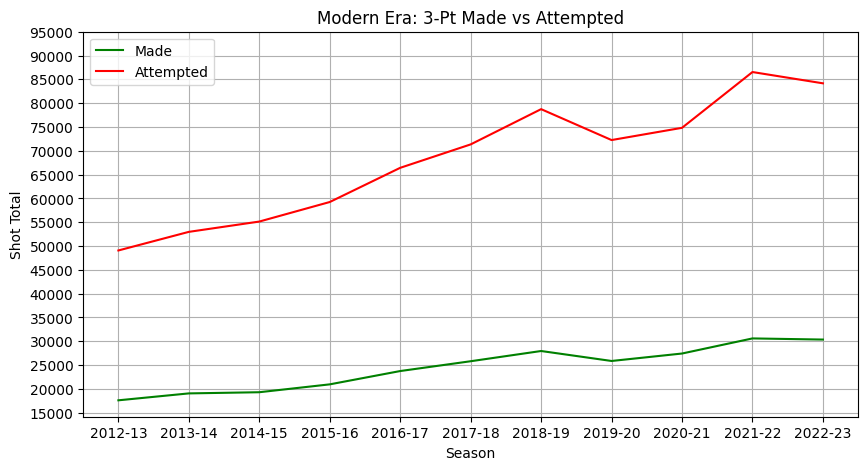

In [178]:
plt.figure(figsize=(10, 5))
plt.plot(made_3P.index, made_3P.values, color="green", label="Made")
plt.plot(attempted_3P.index, attempted_3P.values, color="red", label="Attempted")
plt.legend()
plt.xlabel("Season")
plt.ylabel("Shot Total")
plt.title("Modern Era: 3-Pt Made vs Attempted")
plt.yticks(np.arange(15000, 100000, step=5000))
plt.grid()

In [179]:
rs_data.groupby(["Player"])["Points Scored"].sum().sort_values(ascending=False).head(10)

Player
James Harden             21898
LeBron James             19607
Damian Lillard           19376
DeMar DeRozan            18559
Stephen Curry            18557
Russell Westbrook        18528
Kevin Durant             16914
Giannis Antetokounmpo    16280
Anthony Davis            15841
Bradley Beal             15391
Name: Points Scored, dtype: int64

In [180]:
rs_data.groupby(["Player"])["Minutes Played"].sum().sort_values(ascending=False).head(
    10
)

Player
James Harden         28880
DeMar DeRozan        28751
Damian Lillard       27941
Russell Westbrook    26892
LeBron James         26597
Harrison Barnes      26426
Tobias Harris        25575
Nikola Vucevic       24803
Kyle Lowry           24665
Jimmy Butler         24643
Name: Minutes Played, dtype: int64

In [21]:
rs_data.columns


NameError: name 'rs_data' is not defined